## Final Project
### IMDb Movies Extensive Dataset, 81k+ movies and 175k+ cast members scraped from IMDb

#### David Chung & Mia Kobayashi <br>Professor Michael Ruddy<br>17 May 2021

Website we extracted the data from: [Kaggle](https://www.kaggle.com/)  
The exact link ([here](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)).

In [1]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
set.seed(2021)

In [3]:
imdb_movies <- read_csv("IMDbMovies_ExtensiveDataset_Kaggle/IMDb_movies.csv")
imdb_names <- read_csv("IMDbMovies_ExtensiveDataset_Kaggle/IMDb_names.csv")
imdb_ratings <- read_csv("IMDbMovies_ExtensiveDataset_Kaggle/IMDb_ratings.csv")
imdb_titlePrincipals <- read_csv("IMDbMovies_ExtensiveDataset_Kaggle/IMDb_title_principals.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  year = col_double(),
  duration = col_double(),
  avg_vote = col_double(),
  votes = col_double(),
  metascore = col_double(),
  reviews_from_users = col_double(),
  reviews_from_critics = col_double()
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“1 parsing failure.
  row  col expected        actual                                                 file
83918 year a double TV Movie 2019 'IMDbMovies_ExtensiveDataset_Kaggle/IMDb_movies.csv'
”

── Column specification ────────────────────────────────────────────────────────
cols(
  imdb_name_id = col_character(),
  name = col_character(),
  birth_name = col_character(),
  height = col_double(),
  bio = col_character(),
  birth_details = col_character(),
  date_of_birth = col_character(),
  place_of_birth = col_character(),
  death_details = col_character(),
  date_of_death = col_date(format = "")

In [4]:
imdb_movies %>%
    print()

# A tibble: 85,855 x 22
   imdb_title_id title     original_title    year date_published genre  duration
   <chr>         <chr>     <chr>            <dbl> <chr>          <chr>     <dbl>
 1 tt0000009     Miss Jer… Miss Jerry        1894 1894-10-09     Roman…       45
 2 tt0000574     The Stor… The Story of th…  1906 1906-12-26     Biogr…       70
 3 tt0001892     Den sort… Den sorte drøm    1911 1911-08-19     Drama        53
 4 tt0002101     Cleopatra Cleopatra         1912 1912-11-13     Drama…      100
 5 tt0002130     L'Inferno L'Inferno         1911 1911-03-06     Adven…       68
 6 tt0002199     From the… From the Manger…  1912 1913           Biogr…       60
 7 tt0002423     Madame D… Madame DuBarry    1919 1919-11-26     Biogr…       85
 8 tt0002445     Quo Vadi… Quo Vadis?        1913 1913-03-01     Drama…      120
 9 tt0002452     Independ… Independenta Ro…  1912 1912-09-01     Histo…      120
10 tt0002461     Richard … Richard III       1912 1912-10-15     Drama        55
# … 

In [5]:
imdb_names %>%
    print()

# A tibble: 297,705 x 17
   imdb_name_id name   birth_name  height bio      birth_details   date_of_birth
   <chr>        <chr>  <chr>        <dbl> <chr>    <chr>           <chr>        
 1 nm0000001    Fred … Frederic A…    177 "Fred A… May 10, 1899 i… 1899-05-10   
 2 nm0000002    Laure… Betty Joan…    174 "Lauren… September 16, … 1924-09-16   
 3 nm0000003    Brigi… Brigitte B…    166 "Brigit… September 28, … 1934-09-28   
 4 nm0000004    John … John Adam …    170 "John B… January 24, 19… 1949-01-24   
 5 nm0000005    Ingma… Ernst Ingm…    179 "Ernst … July 14, 1918 … 1918-07-14   
 6 nm0000006    Ingri… Ingrid Ber…    178 "Ingrid… August 29, 191… 1915-08-29   
 7 nm0000007    Humph… Humphrey D…    173 "Humphr… December 25, 1… 1899-12-25   
 8 nm0000008    Marlo… Marlon Bra…    175 "Marlon… April 3, 1924 … 1924-04-03   
 9 nm0000009    Richa… Richard Wa…    178 "Probab… November 10, 1… 1925-11-10   
10 nm0000010    James… James Fran…    165 "One of… July 17, 1899 … 1899-07-17   
# …

In [6]:
imdb_ratings %>%
    print()

# A tibble: 85,855 x 49
   imdb_title_id weighted_average_vo… total_votes mean_vote median_vote votes_10
   <chr>                        <dbl>       <dbl>     <dbl>       <dbl>    <dbl>
 1 tt0000009                      5.9         154       5.9           6       12
 2 tt0000574                      6.1         589       6.3           6       57
 3 tt0001892                      5.8         188       6             6        6
 4 tt0002101                      5.2         446       5.3           5       15
 5 tt0002130                      7          2237       6.9           7      210
 6 tt0002199                      5.7         484       5.8           6       33
 7 tt0002423                      6.8         753       6.8           7       80
 8 tt0002445                      6.2         273       6.2           6       15
 9 tt0002452                      6.7         198       7.1           7       53
10 tt0002461                      5.5         225       5.4           6        9
# … 

In [7]:
imdb_titlePrincipals %>%
    print()

# A tibble: 835,513 x 6
   imdb_title_id ordering imdb_name_id category job    characters               
   <chr>            <dbl> <chr>        <chr>    <chr>  <chr>                    
 1 tt0000009            1 nm0063086    actress  NA     "[\"Miss Geraldine Holbr…
 2 tt0000009            2 nm0183823    actor    NA     "[\"Mr. Hamilton\"]"     
 3 tt0000009            3 nm1309758    actor    NA     "[\"Chauncey Depew - the…
 4 tt0000009            4 nm0085156    director NA      NA                      
 5 tt0000574            1 nm0846887    actress  NA     "[\"Kate Kelly\"]"       
 6 tt0000574            2 nm0846894    actor    NA     "[\"School Master\"]"    
 7 tt0000574            3 nm3002376    actor    NA     "[\"Steve Hart\"]"       
 8 tt0000574            4 nm0170118    actress  NA      NA                      
 9 tt0000574            5 nm0846879    director NA      NA                      
10 tt0000574            6 nm0317210    producer produ…  NA                      
# … 

## Country vs. Total Number of Movies Produced (over the time frame of the dataset):

#### Hypothesis:
The USA will be the country that makes the most movies, with European countries following suit, then Asian.

In [8]:
#seeing which country has produced the most movies over the time frame
country_movie_production <- imdb_movies %>%
    group_by(country) %>%
    summarize(num_movies = n()) %>% #85855 rows, unique is 4908
    arrange(desc(num_movies))
#country_movie_production

#top 10 countries that produce the most movies
top10_country_movie_production <- country_movie_production %>%
    head(10)
top10_country_movie_production

country,num_movies
<chr>,<int>
USA,28511
India,6065
UK,4111
Japan,3077
France,3055
Italy,2444
Canada,1802
Germany,1396
Turkey,1351


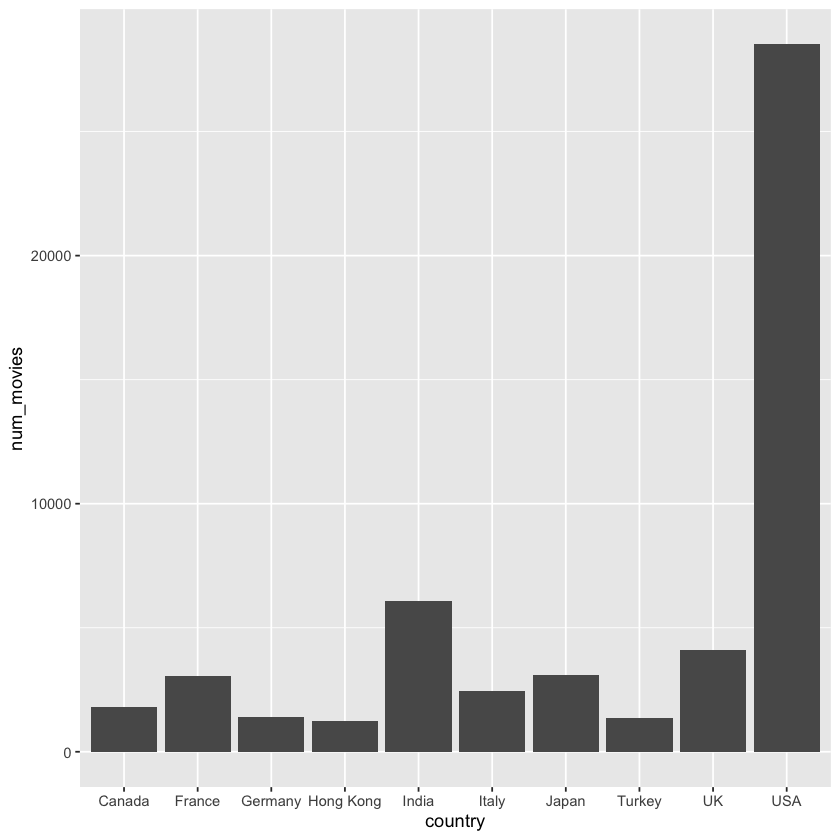

In [9]:
ggplot(data = top10_country_movie_production, mapping = aes(x = country, y = num_movies)) +
    geom_bar(stat = 'identity')

Noting that USA, India, and the UK were the top three countries that produced the highest movies in the dataset, we wanted to compare the movie output production per year between the three countries:

In [10]:
top3_movie_production <- imdb_movies %>%
    filter(country == c("India", "UK", "USA")) %>%
    group_by(country, year) %>%
    summarize(count = n()) %>%
    na.omit %>%
    print(width = Inf)

Warning message in country == c("India", "UK", "USA"):
“longer object length is not a multiple of shorter object length”
`summarise()` has grouped output by 'country'. You can override using the `.groups` argument.



# A tibble: 274 x 3
# Groups:   country [3]
   country  year count
   <chr>   <dbl> <int>
 1 India    1936     1
 2 India    1948     1
 3 India    1949     1
 4 India    1951     2
 5 India    1952     4
 6 India    1953     1
 7 India    1954     1
 8 India    1955     2
 9 India    1956     1
10 India    1957     2
# … with 264 more rows


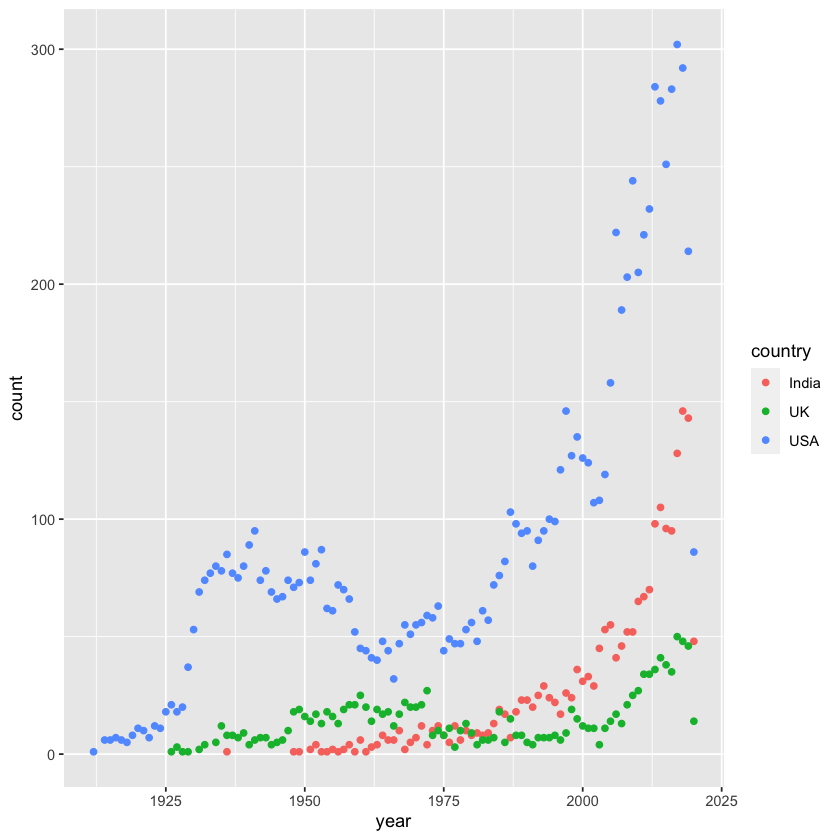

In [11]:
ggplot(data = top3_movie_production, mapping = aes(x = year, y = count)) +
    geom_point(mapping = aes(color = country))

Hypothesis: The USA will be the country that makes the most movies, with European countries following suit, then Asian.  
Post-modeling: While the USA is the country that has made the most movies in this dataset, India is the second country that produces the most movies, followed by the UK, then Japan and France.  Additionally, after comparing the top three countries and their annual movie production, we also saw that the US produces a substantial amount more movies than its counterparts.

In [12]:
top10_country_movie_production %>%
    head(5)

country,num_movies
<chr>,<int>
USA,28511
India,6065
UK,4111
Japan,3077
France,3055


## Time vs. Movie Ratings
#### Hypothesis:
Movie ratings, on average, have gotten better as time went on.

In [13]:
movieRatings_by_year <- imdb_movies %>%
    separate(date_published, into = c("year", "month", "day"), sep = "-") %>%
    group_by(year) %>%
    mutate(year = as.double(year)) %>%
    summarize(avg_rating = mean(avg_vote, na.rm = TRUE), votes = sum(votes)) %>%
    na.omit %>%
    print(width = Inf)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 4563 rows [6, 56, 101, 118, 145, 176, 204, 224, 227, 249, 250, 253, 259, 261, 337, 344, 373, 398, 399, 438, ...].”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


# A tibble: 113 x 3
    year avg_rating votes
   <dbl>      <dbl> <dbl>
 1  1894       5.9    154
 2  1906       6.1    589
 3  1911       6.14  2833
 4  1912       6.05  1174
 5  1913       6.44  9364
 6  1914       6.11 15676
 7  1915       6.4  37142
 8  1916       6.28 13079
 9  1917       6.32 12292
10  1918       6.11 31847
# … with 103 more rows


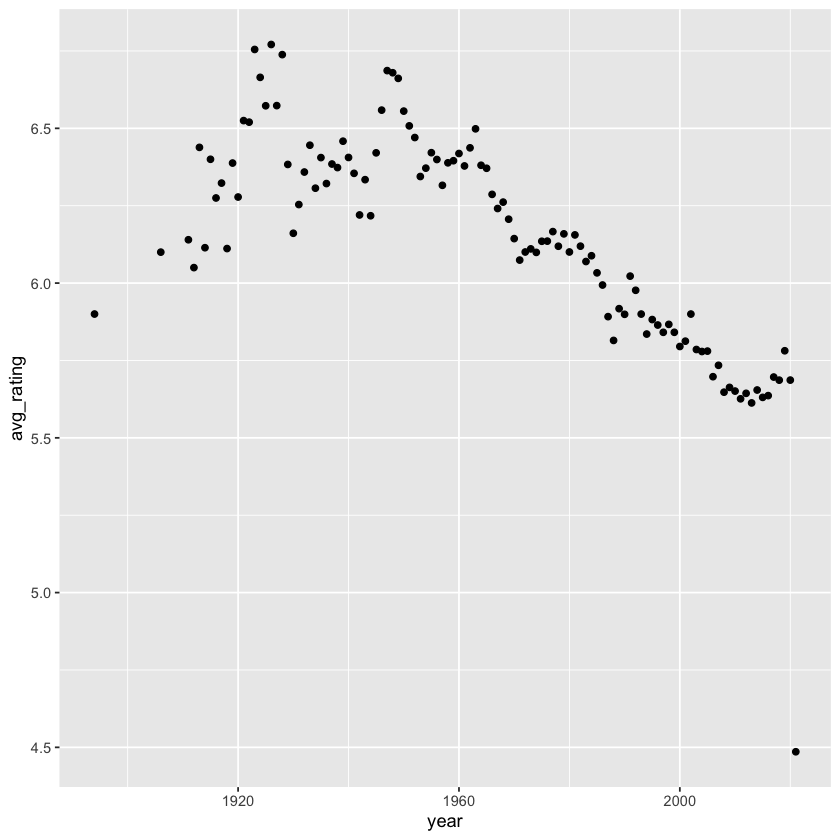

In [14]:
ggplot(data = movieRatings_by_year) +
    geom_point(mapping = aes(x = year, y = avg_rating))

Seeing that there is a general downward trend in movie ratings over the years, with a drastic drop in the year 2021 (which might be due to the lack of data for that year), we found a linear model to the data:

In [15]:
lmFit_yearVavgRating <- lm(avg_rating ~ year, data = movieRatings_by_year)
lmFit_yearVavgRating

a_lmFit_yVaR <- lmFit_yearVavgRating[[1]]


Call:
lm(formula = avg_rating ~ year, data = movieRatings_by_year)

Coefficients:
(Intercept)         year  
  21.643816    -0.007888  


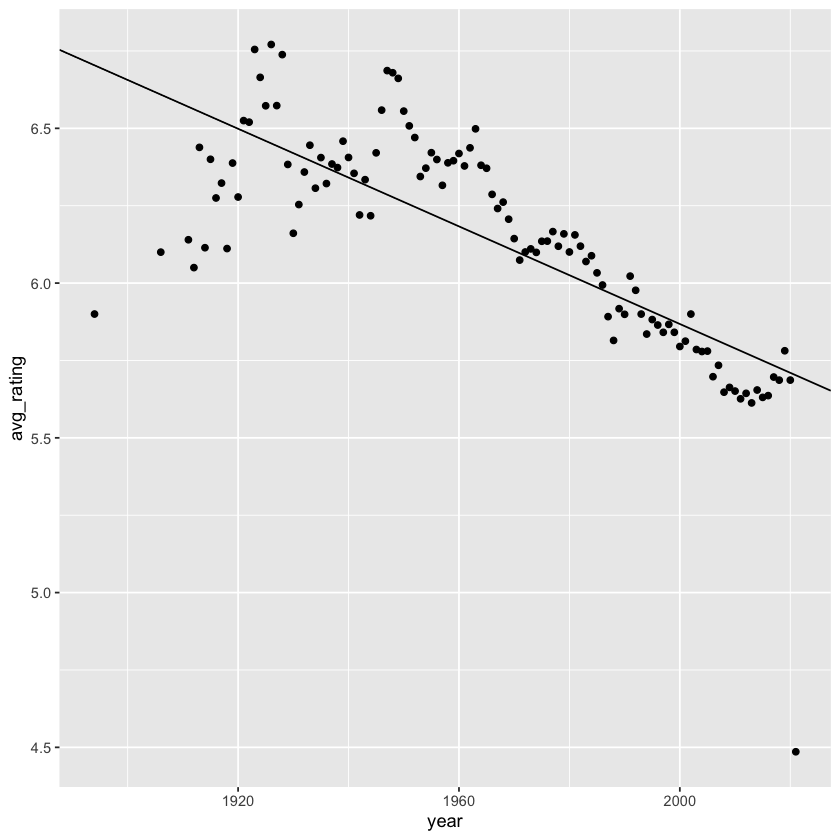

In [16]:
ggplot(data = movieRatings_by_year, mapping = aes(x = year, y = avg_rating)) +
    geom_point() +
    geom_abline(mapping = aes(intercept = a_lmFit_yVaR[1], slope = a_lmFit_yVaR[2]))

From here, we thought it'd be interesting to look at the average rating by month, for all years combined:

In [17]:
avg_movieRatings_by_month <- imdb_movies %>%
    separate(date_published, into = c("year", "month", "day"), sep = "-") %>%
    group_by(month) %>%
    summarize(avg_rating = mean(avg_vote, na.rm = TRUE)) %>%
    na.omit

avg_movieRatings_by_month

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 4563 rows [6, 56, 101, 118, 145, 176, 204, 224, 227, 249, 250, 253, 259, 261, 337, 344, 373, 398, 399, 438, ...].”


month,avg_rating
<chr>,<dbl>
01,5.912985
02,5.932510
03,5.932239
04,5.915880
05,5.862190
06,5.840655
07,5.785444
08,5.843288
09,5.969687


At first glance, all the ratings seem close together, but after graphing...

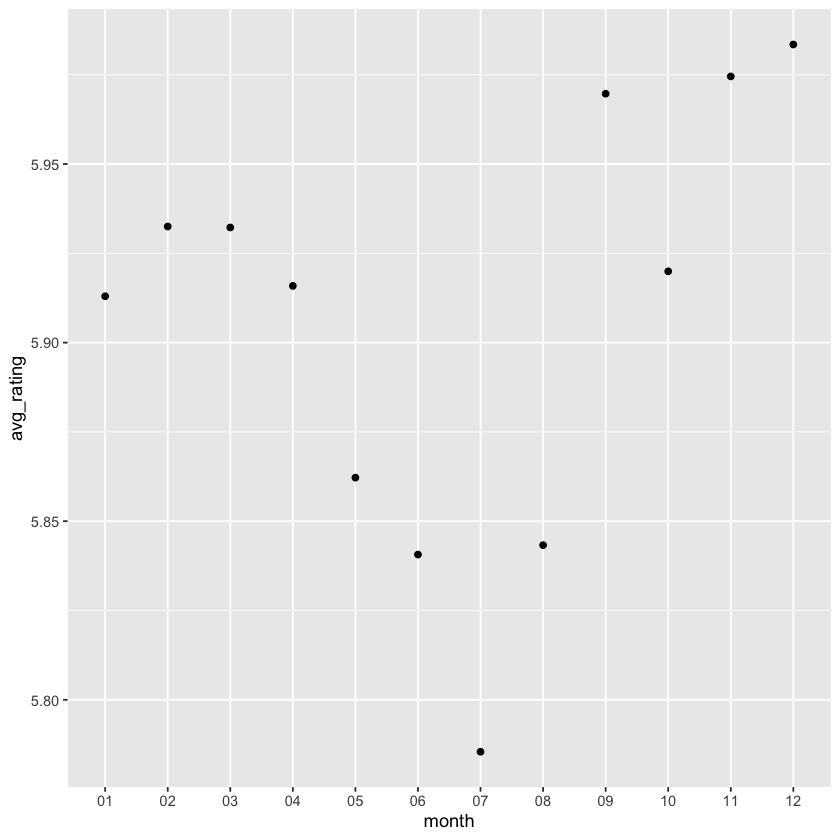

In [18]:
ggplot(data = avg_movieRatings_by_month) +
    geom_point(mapping = aes(x = month, y = avg_rating))

While all ratings were within a 5-6 rating, it was noted that December, November, and September had the highest ratings on average over the time period in the dataset.

Hypothesis: Movie ratings, on average, have gotten better as time went on.  
Post-modeling: As time has progressed, movie ratings have actually gotten worse.  Wondering why this could be so, it might be because more people's votes were counted to find the rating of a movie in recent years as compared to a century ago.  Additionally, when determining if a specific month had better movie rating than another, it was interesting to see that the late fall and early winter months will have the highest ratings on average, which is possibly due to the holiday season and the cooler temperatures of the year so maybe people want to do more indoor activities (like going to the theatre and watching a movie).

## Time vs. Movie Budget
#### Hypothesis:
The budget (in USD, regardless of country) that is spent on movie productions will remain relatively constant over the years.

In [19]:
yearVbudget <- imdb_movies %>%
    separate(budget, into = c("budget_form", "budget"), sep = " ") %>%
    na.omit(budget_form) %>%
    filter(budget_form == "$") %>%
    mutate(budget = as.integer(budget)) %>%
    group_by(year) %>%
    summarize(avg_budget = mean(budget, na.rm = TRUE)) %>%
    mutate(years_since_1894 = year - 1894) %>%
    mutate(avg_budget_in_millions = avg_budget / 1000000) %>%
    print(width = Inf)

# A tibble: 80 x 4
    year avg_budget years_since_1894 avg_budget_in_millions
 * <dbl>      <dbl>            <dbl>                  <dbl>
 1  1931   1500000                37                  1.5  
 2  1936   1500000                42                  1.5  
 3  1937    779500                43                  0.780
 4  1939   2884667.               45                  2.88 
 5  1940   2440000                46                  2.44 
 6  1941    839727                47                  0.840
 7  1942    950000                48                  0.95 
 8  1946   2100000                52                  2.1  
 9  1948   3000000                54                  3    
10  1950   1516667.               56                  1.52 
# … with 70 more rows


60% / 20% / 20% split

In [20]:
#this is training set
yearVbudget_train <- yearVbudget %>%
    sample_frac(0.60)
#yearVbudget_train
#68 rows

yearVbudget_valid_test <- anti_join(yearVbudget, yearVbudget_train, by = "year")
#yearVbudget_valid_test
#45 rows

#this is validation set
yearVbudget_valid <- yearVbudget_valid_test %>%
    sample_frac(0.50)
#yearVbudget_valid
#22 rows

#this is test set
yearVbudget_test <- anti_join(yearVbudget_valid_test, yearVbudget_valid, by = "year")
#yearVbudget_test
#23 rows

In [21]:
RMSE_timeBudget <- function(a, data) {
    totalPredict <- a[1] + (a[2] * data$years_since_1894)
    diff <- totalPredict - data$avg_budget_in_millions
    sq_diff <- diff ** 2
    sqrt(mean(sq_diff))
}

best_yearVbudget <- optim(c(-15, 1/100), RMSE_timeBudget, data = mutate(yearVbudget_train, x = years_since_1894, y = avg_budget_in_millions))
best_yearVbudget

a_yearVbudget <- best_yearVbudget$par

$par
[1] -37.5887241   0.6321051

$value
[1] 5.315396

$counts
function gradient 
      87       NA 

$convergence
[1] 0

$message
NULL

[1] "Error: Root Mean Squared Error"
[1] 5.315396


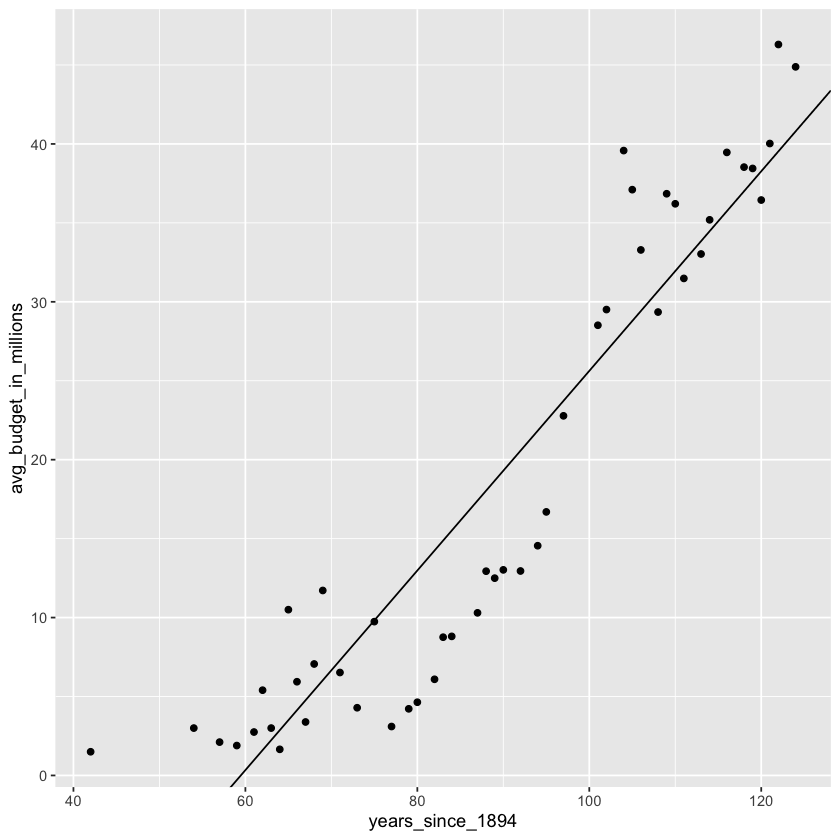

In [22]:
print("Error: Root Mean Squared Error")
print(RMSE_timeBudget(a_yearVbudget, yearVbudget_train))

ggplot(data = yearVbudget_train) +
    geom_point(mapping = aes(x = years_since_1894, y = avg_budget_in_millions)) +
    geom_abline(mapping = aes(intercept = a_yearVbudget[1], slope = a_yearVbudget[2]))

[1] "Error: Root Mean Squared Error"
[1] 7.135433


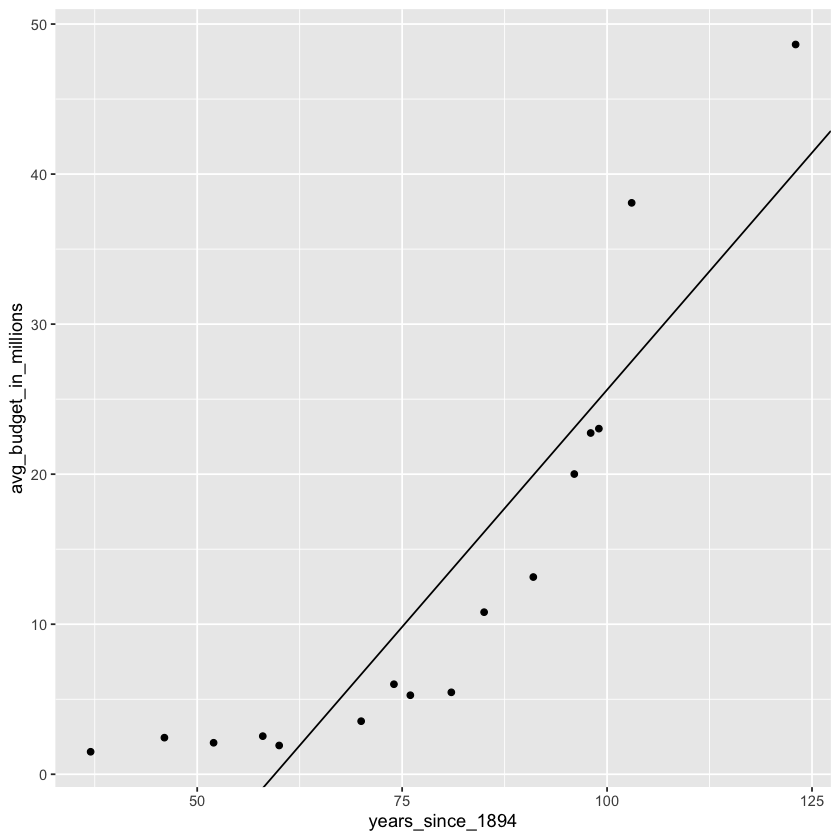

In [23]:
print("Error: Root Mean Squared Error")
print(RMSE_timeBudget(a_yearVbudget, yearVbudget_valid))

ggplot(data = yearVbudget_valid) +
    geom_point(mapping = aes(x = years_since_1894, y = avg_budget_in_millions)) +
    geom_abline(mapping = aes(intercept = a_yearVbudget[1], slope = a_yearVbudget[2]))

[1] "Error: Root Mean Squared Error"
[1] 6.765486


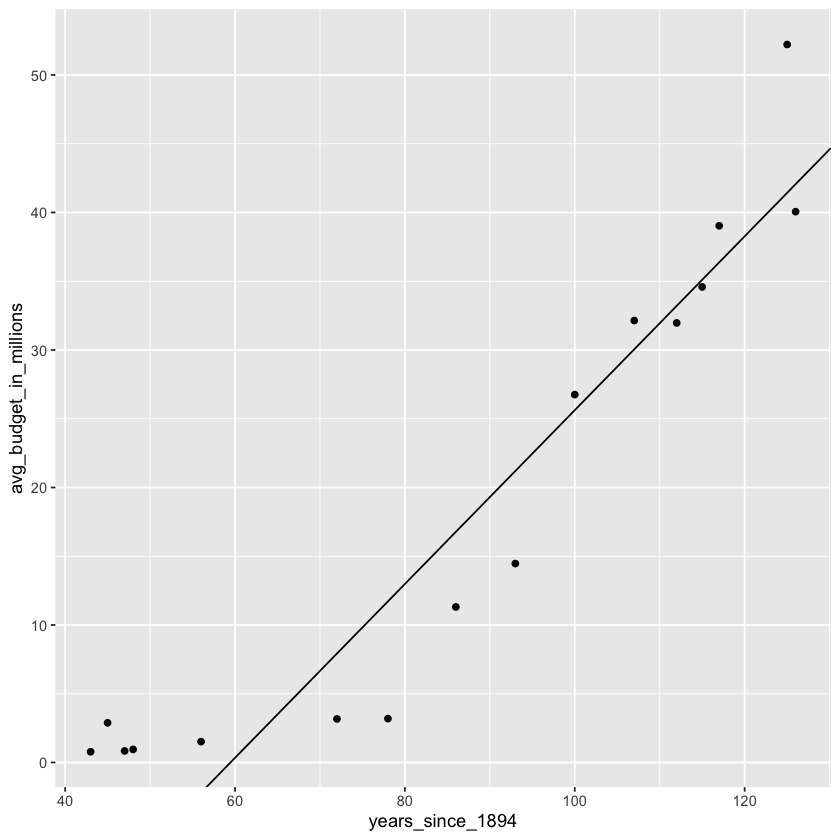

In [24]:
print("Error: Root Mean Squared Error")
print(RMSE_timeBudget(a_yearVbudget, yearVbudget_test))

ggplot(data = yearVbudget_test) +
    geom_point(mapping = aes(x = years_since_1894, y = avg_budget_in_millions)) +
    geom_abline(mapping = aes(intercept = a_yearVbudget[1], slope = a_yearVbudget[2]))

Training RMSE: 5.315396  
Validation RMSE: 7.135433  
Test RMSE: 6.765486 


In comparison to the test and the training dataset, the validation dataset had the lowest RMSE score.  The RMSE score overall isn't as low as we'd like it to be, but it's an adequate model for predicting that as the years increase, so will the budget of a movie.

Hypothesis: The budget (in USD, regardless of country) that is spent on movie productions will remain relatively constant over the years.  
Post-modeling: As per the graphs, it is seen that the budget for movie productions have actually increased.  We are not sure if the original dataset considered inflation.  But if not, the increase in budget is probably due to better technology, post-production work, quality, and set props, not to mention all the people working to put the movie together as well.

## Budget vs. US Gross Income in the U.S.
#### Hypothesis:
The higher the budget of the movie is, the more gross income in the U.S. the movie will have collected.

In [25]:
# tidying the data to just "USA" because too difficult to coerce all different currencies to type double 
usa_movies <- imdb_movies %>%
    filter(country == "USA") %>%
    separate(budget, into = c("currency", "budget"), sep = " ") %>%
    separate(usa_gross_income, into = c("dollar", "usa_gross_income"), sep = " ") %>%
    separate(worlwide_gross_income, into = c("dollar2", "worldwide_gross_income"), sep = " ") %>%
    select(-c("currency", "dollar", "dollar2")) %>%
    mutate(budget = as.double(budget), usa_gross_income = as.double(usa_gross_income), worldwide_gross_income = as.double(worldwide_gross_income)) %>%
    na.omit(usa_movies) %>%     # removed all observations with any missing values
    print(width = Inf)

# A tibble: 3,528 x 22
   imdb_title_id title                     original_title                   year
   <chr>         <chr>                     <chr>                           <dbl>
 1 tt0021749     Luci della città          City Lights                      1931
 2 tt0027977     Tempi moderni             Modern Times                     1936
 3 tt0029583     Biancaneve e i sette nani Snow White and the Seven Dwarfs  1937
 4 tt0031381     Via col vento             Gone with the Wind               1939
 5 tt0031679     Mr. Smith va a Washington Mr. Smith Goes to Washington     1939
 6 tt0032138     Il mago di Oz             The Wizard of Oz                 1939
 7 tt0032455     Fantasia                  Fantasia                         1940
 8 tt0032910     Pinocchio                 Pinocchio                        1940
 9 tt0033467     Quarto potere             Citizen Kane                     1941
10 tt0034583     Casablanca                Casablanca                       1942
   da

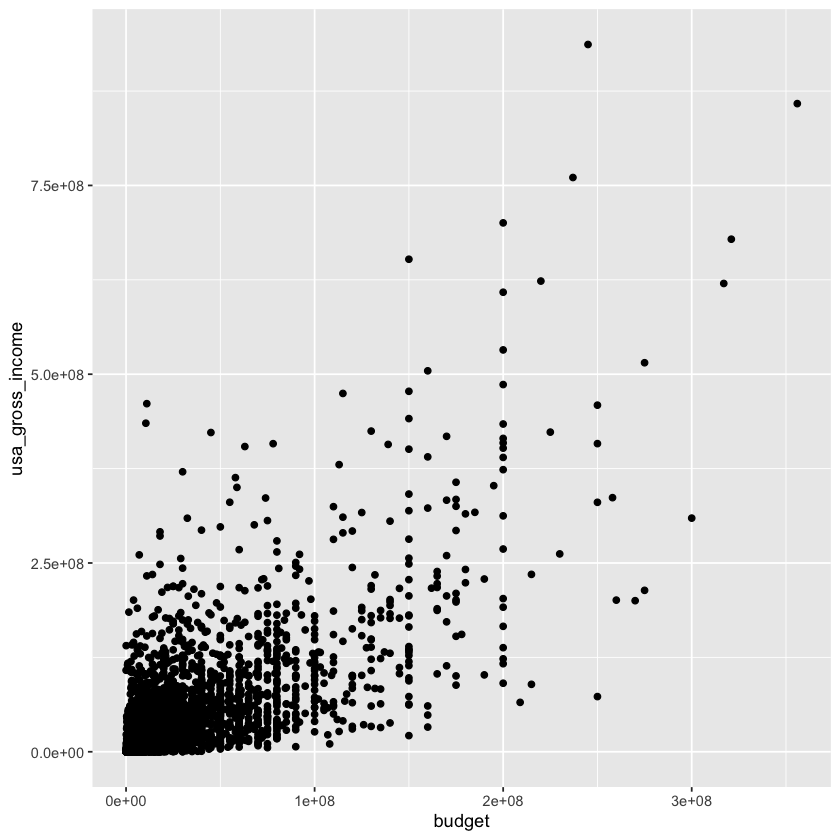

In [26]:
ggplot(usa_movies) +
    geom_point(aes(budget, usa_gross_income))

In [27]:
# training set is random 60% of total dataset
train1 <- usa_movies %>%
    sample_frac(0.60)

In [28]:
# this is the 40% split that will be divided into the 20%/20% validation and test sets
# intermediate step to get validation and test set
valid_test1 <- anti_join(usa_movies, train1, by = "imdb_title_id")

# validation set is 20% split of data 
valid1 <- valid_test1 %>%
    sample_frac(0.50)

# test set is last 20% of data
test1 <- anti_join(valid_test1, valid1, by = "imdb_title_id")

In [29]:
# linear model predicting expected usa_gross_income values from budget values
RMSE <- function(a, data) {
    preds <- a[1] + data$x * a[2]
    diffs <- data$y - preds
    sqrt(mean(diffs^2))
}

best2 <- optim(c(0, 0), RMSE,  data = mutate(train1, x = budget, y = usa_gross_income))
best2$par

[1] 0.3681073 1.3750078

In [30]:
# appears linear regression line was overfitted to training set
RMSE(best2$par, data = mutate(valid1, x = budget, y = usa_gross_income))

RMSE(best2$par, data = mutate(test1, x = budget, y = usa_gross_income))

[1] 52518406

[1] 64529805

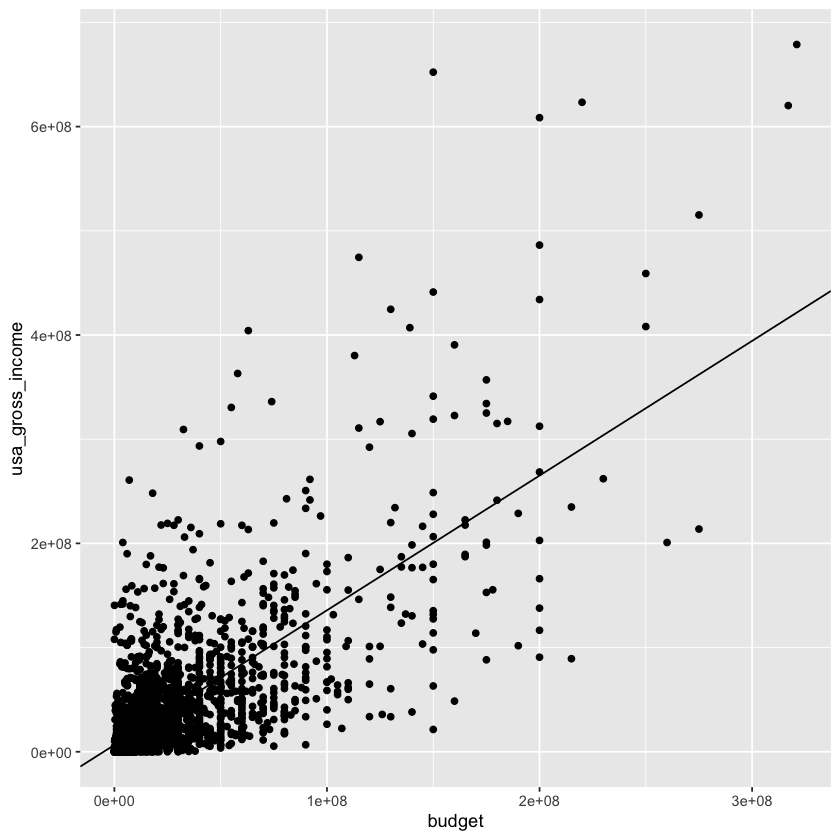

In [31]:
# plotted the training set with fitted model
ggplot(train1) +
    geom_point(aes(budget, usa_gross_income)) +
    geom_abline(aes(intercept = 6.515e+06, slope = 1.293e+00))

We confirmed our hypothesis (for the most part). It appears that the higher the budget of a movie is, the more gross income it will produce.

## Budget, Metascore, Average Vote vs. Gross Income in the U.S.
#### Hypothesis:
Budget, metascore, and avg vote together will be good predictors of gross income produced in the U.S.  
The binary classification model will be more effective than the linear regression model.

In [32]:
RMSE_mult <- function(a, data) {
    preds <- a[1] + data$x1 * a[2] + data$x2 * a[3] + data$x3 *a[4]
    diffs <- data$y - preds
    sqrt(mean(diffs^2))
}

best_lin <- optim(c(0, 0, 0, 0), RMSE_mult,  data = mutate(train1, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income))
best_lin$par

[1] -0.07928833  1.37512223  0.22936403 -0.55934333

In [33]:
# again line still overfitted to training set
RMSE_mult(best_lin$par, data = mutate(valid1, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income))

RMSE_mult(best_lin$par, data = mutate(test1, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income))

[1] 52518053

[1] 64529270

In [34]:
# next up is a binary classification model
# create a binary TRUE/FALSE column
train2 <- train1 %>%
    mutate(usa_gross_income_above_50mil = usa_gross_income > 50000000)

cols <- sapply(train2, is.logical)
train2[, cols] <- lapply(train2[, cols], as.double)

# reference for code:
# https://stackoverflow.com/questions/30943167/replace-logical-values-true-false-with-numeric-1-0

In [35]:
logistic_model <- function(a, data) {
    (1) / (1 + exp(-(a[1] + data$x1 * a[2] + data$x2 * a[3] + data$x3 * a[4])))
}

In [36]:
BCE <- function(a, data) {
    preds <- logistic_model(a, data) #finds p(xi)
    truth <- data$y #finds yi, either 0 or 1
    value <- truth * log(preds) + (1 - truth) * log(1 - preds)
    mean(-value)
}

best_log <- optim(c(0, 0, 0, 0), BCE, data = mutate(train2, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income_above_50mil))
best_log

a_log <- best_log$par

$par
[1]  6.737045e-03  2.715622e-08 -2.974920e-02  1.803736e-02

$value
[1] 0.5490181

$counts
function gradient 
     341       NA 

$convergence
[1] 0

$message
NULL

In [37]:
# need to observe accuracy of logistic model
avg_accuracy_log <- function(a, data, threshold = 0.5) {
    preds <- logistic_model(a, data)   # get predictions for our data
    preds <-  preds > 0.5   # turn our probabilities into predictions, using our threshold
        #this takes predicition, and turns into a boolean, true or false, anything > 0.5 is true, < 0.5 is false
    
    # remember that in a Boolean vector, T is 1 and F is 0!
    truth <- data$y
    wrong <- abs(preds - truth)
    pct_wrong <- sum(wrong) / length(wrong)
    1 - pct_wrong
}

In [38]:
# avg_accuracy score of training set
avg_accuracy_log(a_log, mutate(train2, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income_above_50mil))


[1] 0.7515352

In [39]:
# create a binary TRUE/FALSE column for validation set
valid2 <- valid1 %>%
    mutate(usa_gross_income_above_50mil = usa_gross_income > 50000000)

cols <- sapply(valid2, is.logical)
valid2[, cols] <- lapply(valid2[, cols], as.double)

# new test set with binary TRUE/FALSE column
test2 <- test1 %>%
    mutate(usa_gross_income_above_50mil = usa_gross_income > 50000000)

cols <- sapply(test2, is.logical)
test2[, cols] <- lapply(test2[, cols], as.double)


In [40]:
# avg_accuracy score of validation set
avg_accuracy_log(a_log, mutate(valid2, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income_above_50mil))

# avg_accuracy score of test set
avg_accuracy_log(a_log, mutate(test2, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income_above_50mil))

[1] 0.7223796

[1] 0.7446809

In [41]:
# check accuracy of linear regression model
avg_accuracy_lin <- function(a, data, threshold = 0.5) {
    preds <- RMSE_mult(a, data)   # get predictions for our data
    preds <-  preds > 0.5   # turn our probabilities into predictions, using our threshold
        #this takes predicition, and turns into a boolean, true or false, anything > 0.5 is true, < 0.5 is false
    
    # remember that in a Boolean vector, T is 1 and F is 0!
    truth <- data$y
    wrong <- abs(preds - truth)
    pct_wrong <- sum(wrong) / length(wrong)
    1 - pct_wrong
}

In [42]:
# accuracy of linear regression model on training set
# accuracy was much worse than binary classification, line overfitted
avg_accuracy_lin(best_lin$par, mutate(train2, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income_above_50mil))

[1] 0.2900331

In [43]:
# accuracy of linear regression model on validation set
# accuracy was much worse than binary classification, line overfitted
avg_accuracy_lin(best_lin$par, mutate(valid2, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income_above_50mil))

[1] 0.2946176

In [44]:
# accuracy of linear regression model on test set
# accuracy was much worse than binary classification, line overfitted
avg_accuracy_lin(best_lin$par, mutate(test2, x1 = budget, x2 = metascore, x3 = avg_vote, y = usa_gross_income_above_50mil))

[1] 0.3248227

Budget, metascore, and avg vote together were favorable predictors of gross income produced in the U.S. Furthermore, the binary classification model was indeed more accurate, with accuracy rates hovering around 70% compared to around 30% accuracy for the linear regression model.

## Duration vs. Genre
#### Hypothesis:
Movies with the genre of history, biography, and war will have the longest durations because these generally have more complex plots. Animation will have the shortest duration because these usually have light plots and are more for entertainment.

In [45]:
# tidy dataset, split genre into 3 separate columns so that we can group later on
imdb_genre <- imdb_movies %>%
    separate(genre, into = c("genre1", "genre2", "genre3"), sep = ",") %>%
    mutate(duration = as.integer(duration)) %>%
    print(width = Inf)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 54623 rows [1, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, ...].”


# A tibble: 85,855 x 24
   imdb_title_id title                                              
   <chr>         <chr>                                              
 1 tt0000009     Miss Jerry                                         
 2 tt0000574     The Story of the Kelly Gang                        
 3 tt0001892     Den sorte drøm                                     
 4 tt0002101     Cleopatra                                          
 5 tt0002130     L'Inferno                                          
 6 tt0002199     From the Manger to the Cross; or, Jesus of Nazareth
 7 tt0002423     Madame DuBarry                                     
 8 tt0002445     Quo Vadis?                                         
 9 tt0002452     Independenta Romaniei                              
10 tt0002461     Richard III                                        
   original_title                                       year date_published
   <chr>                                               <dbl> <chr>      

In [46]:
# Shows avg duration of movie for each genre
genre_duration <- imdb_genre %>%
    group_by(genre1) %>%
    summarize(mean_duration = mean(duration, na.rm = TRUE)) %>%
    arrange(desc(mean_duration)) 
genre_duration

genre1,mean_duration
<chr>,<dbl>
Biography,113.99565
History,109.11250
Romance,107.95046
Musical,107.66358
Action,107.12494
Sport,105.25000
Drama,102.90751
War,100.75701
Adventure,99.11837


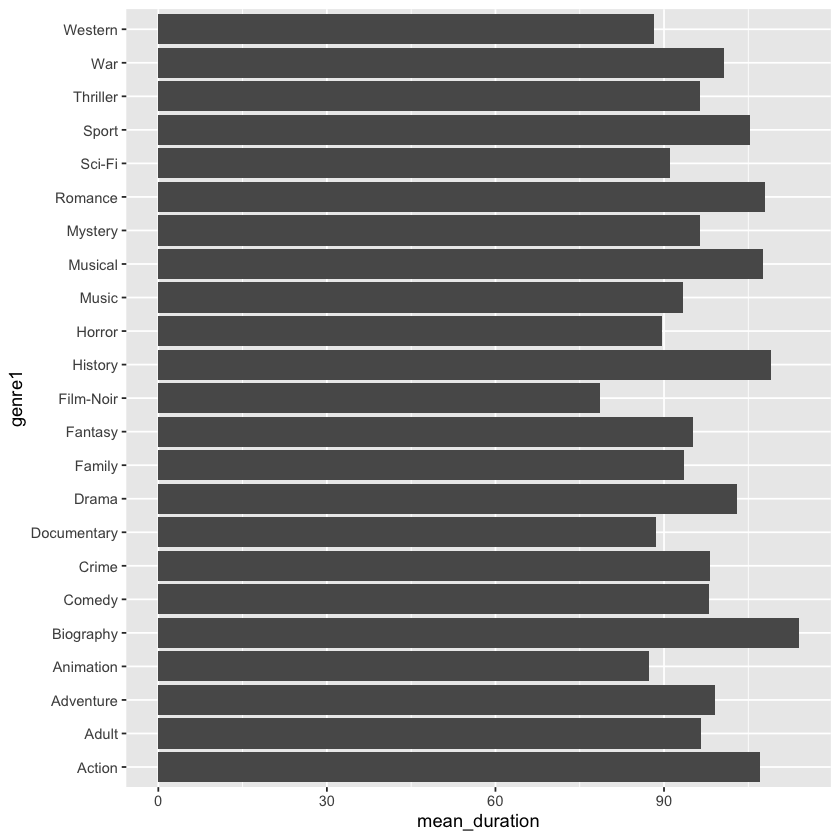

In [47]:
# stat = "identity" means we override the y-value for the bar graph
ggplot(data = genre_duration) +
    geom_bar(aes(y = genre1, x = mean_duration), stat = "identity")

Biography and History had the longest movie durations, which make sense as "real-life" movies are generally longer. Animation and film-noir had the shortest durations, which mad sense as well because those generally do not have the most complex plots.

## Genre vs. Average Vote
#### Hypothesis:
Biographies and drama will have the highest avg vote score while adult and comedy will have the lowest average vote score.

In [48]:
genre_vote <- imdb_genre %>%
    group_by(genre1) %>%
    summarize(mean_vote = mean(avg_vote, na.rm = TRUE)) %>%
    arrange(desc(mean_vote)) 
genre_vote

genre1,mean_vote
<chr>,<dbl>
Documentary,7.300000
Biography,6.638413
Film-Noir,6.603448
Animation,6.386575
Music,6.283117
Drama,6.268865
Musical,6.205247
Crime,6.103743
War,6.078505


We found that documentaries generally had the highest graded votes, which was honestly a little surprising. Adult films had the lowest vote, which kind of makes sense. Our hypothesis was correct for documentaries and adult but not for comedy.

## Average Vote vs. Metascore
#### Hypothesis:
As the avg vote increases, so will the metascore.

In [49]:
imdb_movies_clean <- imdb_movies %>%
    na.omit(imdb_movies)

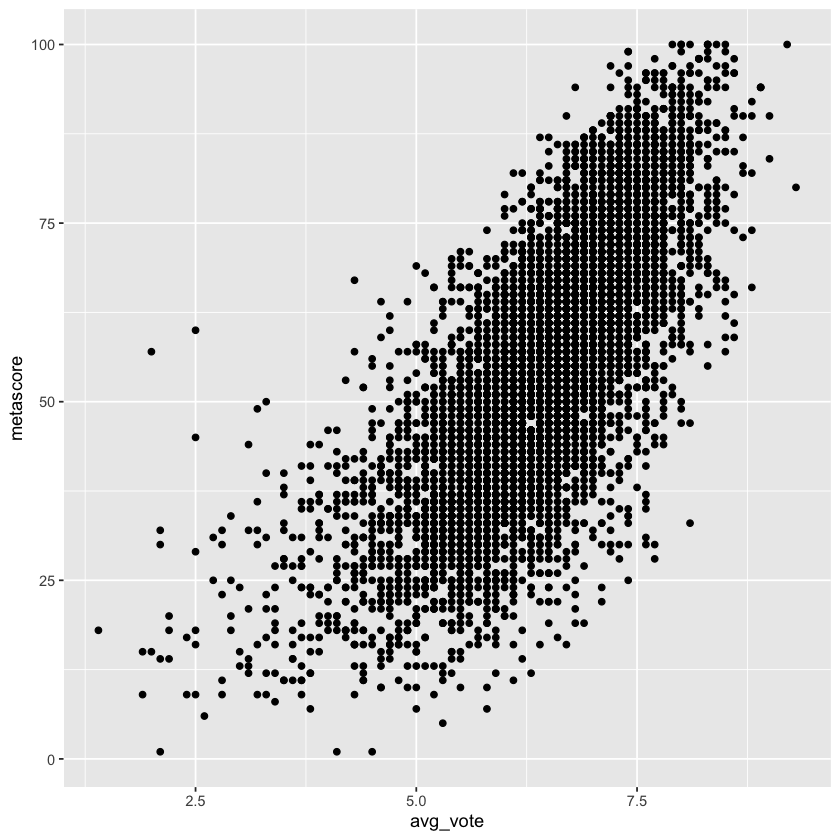

In [50]:
ggplot(data = imdb_movies_clean) +
    geom_point(aes(x = avg_vote, y = metascore))

In [51]:
# training set is random 60% of total dataset
train1 <- imdb_movies_clean %>%
    sample_frac(0.60)

In [52]:
# this is the 40% split that will be divided into the 20%/20% validation and test sets
# intermediate step to get validation and test set
valid_test1 <- anti_join(imdb_movies_clean, train1, by = "imdb_title_id")

# validation set is 20% split of data 
valid1 <- valid_test1 %>%
    sample_frac(0.50)

# test set is last 20% of data
test1 <- anti_join(valid_test1, valid1, by = "imdb_title_id")

In [53]:
RMSE_vm <- function(a, data) {
    preds <- a[1] + data$x * a[2]
    diffs <- data$y - preds
    sqrt(mean(diffs^2))
}

best_lin2 <- optim(c(0, 0), RMSE_vm,  data = mutate(train1, x = avg_vote, y = metascore))
best_lin2$par

a_lin_vm <- best_lin2$par

[1] -32.31964  13.54240

In [54]:
# again line still overfitted to training set
RMSE_vm(a_lin_vm, data = mutate(valid1, x = avg_vote, y = metascore))

RMSE_vm(a_lin_vm, data = mutate(test1, x = avg_vote, y = metascore))

[1] 12.45094

[1] 12.45682

In [55]:
# next up is a binary classification model
# create a binary TRUE/FALSE column
train2 <- train1 %>%
    mutate(metascore_above50 = metascore > 50)

cols <- sapply(train2, is.logical)
train2[, cols] <- lapply(train2[, cols], as.double)

# reference for code:
# https://stackoverflow.com/questions/30943167/replace-logical-values-true-false-with-numeric-1-0

In [56]:
logistic_model_vm <- function(a, data) {
    (1) / (1 + exp(-(a[1] + data$x * a[2])))
}

In [57]:
BCE_vm <- function(a, data) {
    preds <- logistic_model_vm(a, data) #finds p(xi)
    truth <- data$y #finds yi, either 0 or 1
    value <- truth * log(preds) + (1 - truth) * log(1 - preds)
    mean(-value)
}

best_log_vm <- optim(c(0, 0), BCE_vm, data = mutate(train2, x = avg_vote, y = metascore_above50))
best_log_vm

a_log_vm <- best_log_vm$par

$par
[1] -13.438055   2.159245

$value
[1] 0.4447587

$counts
function gradient 
      85       NA 

$convergence
[1] 0

$message
NULL

In [58]:
# need to observe accuracy of logistic model
avg_accuracy_log_vm <- function(a, data, threshold = 0.5) {
    preds <- logistic_model_vm(a, data)   # get predictions for our data
    preds <-  preds > 0.5   # turn our probabilities into predictions, using our threshold
        #this takes predicition, and turns into a boolean, true or false, anything > 0.5 is true, < 0.5 is false
    
    # remember that in a Boolean vector, T is 1 and F is 0!
    truth <- data$y
    wrong <- abs(preds - truth)
    pct_wrong <- sum(wrong) / length(wrong)
    1 - pct_wrong
}

In [59]:
# avg_accuracy score of training set
avg_accuracy_log_vm(a_log_vm, mutate(train2, x = avg_vote, y = metascore_above50))


[1] 0.7876574

In [60]:
# create a binary TRUE/FALSE column for validation set
valid2 <- valid1 %>%
    mutate(metascore_above50 = metascore > 50)

cols <- sapply(valid2, is.logical)
valid2[, cols] <- lapply(valid2[, cols], as.double)

# new test set with binary TRUE/FALSE column
test2 <- test1 %>%
    mutate(metascore_above50 = metascore > 50)

cols <- sapply(test2, is.logical)
test2[, cols] <- lapply(test2[, cols], as.double)


In [61]:
# avg_accuracy score of validation set
avg_accuracy_log_vm(a_log_vm, mutate(valid2, x = avg_vote, y = metascore_above50))

# avg_accuracy score of test set
avg_accuracy_log_vm(a_log_vm, mutate(test2, x = avg_vote, y = metascore_above50))

[1] 0.7928949

[1] 0.7634165

In [62]:
# check accuracy of linear regression model
avg_accuracy_lin_vm <- function(a, data, threshold = 0.5) {
    preds <- RMSE_vm(a, data)   # get predictions for our data
    preds <-  preds > 0.5   # turn our probabilities into predictions, using our threshold
        #this takes predicition, and turns into a boolean, true or false, anything > 0.5 is true, < 0.5 is false
    
    # remember that in a Boolean vector, T is 1 and F is 0!
    truth <- data$y
    wrong <- abs(preds - truth)
    pct_wrong <- sum(wrong) / length(wrong)
    1 - pct_wrong
}

In [63]:
# accuracy of linear regression model on training set
# accuracy was much worse than binary classification, line overfitted
avg_accuracy_lin_vm(a_lin_vm, mutate(train2, x = avg_vote, y = metascore_above50))

[1] 0.5904282

In [64]:
# accuracy of linear regression model on validation set
# accuracy was much worse than binary classification, line overfitted
avg_accuracy_lin_vm(a_lin_vm, mutate(valid2, x = avg_vote, y = metascore_above50))

[1] 0.6031746

In [65]:
# accuracy of linear regression model on test set
# accuracy was much worse than binary classification, line overfitted
avg_accuracy_lin_vm(a_lin_vm, mutate(test2, x = avg_vote, y = metascore_above50))

[1] 0.5895692

We found that there was indeed a positive relationship between avg_vote and metascore. This makes sense because if the audience gave a movie a high score, then it stands to reason that the metascore from the critics would be high as well.  

Furthermore, the binary classification model again outperforms the linear regression model.